In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
plt.style.use('ggplot')

In [37]:
#Importing UCI Dataset
from MakeDataset import *

In [38]:
# Dataset Given
# X_train , y_train
# X_test  , y_test
# X_val   , y_val 
# X_merged, y_merged

#Merging X_train and X_val dataset
X_merged = np.concatenate((X_train, X_val), axis=0)
y_merged = np.concatenate((y_train, y_val), axis=0)
print(y_merged.shape)

(144,)


## Question 1
Plot the waveform for data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 colunms to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

1. Yes, there are noticeable differences between the accelerations of all the six different activities. The waveforms for walking, walking upstairs, and walking downstairs have more pronounced fluctuations compared to sitting, standing, and laying. So we can clearly distinguish walking, upstairs, downstairs amoung laying, standing and sitting.
2. Amoung the activities with fluctuating acceleration the range of fluctuation varies in them. We can notice that just walking has very less amount of fluctuation while walking downstairs have very large amount of fluctuations. So we could use statistics like variance/standard deviation to distinguish amoung these activities.
3. Amoung the static activities we can easily distinguish between them as their acceleration in X, Y and Z directions are in distinct.
4. These differences in patterns between all the activities could potentially be used by a decision tree model to classify the activities based on the data.

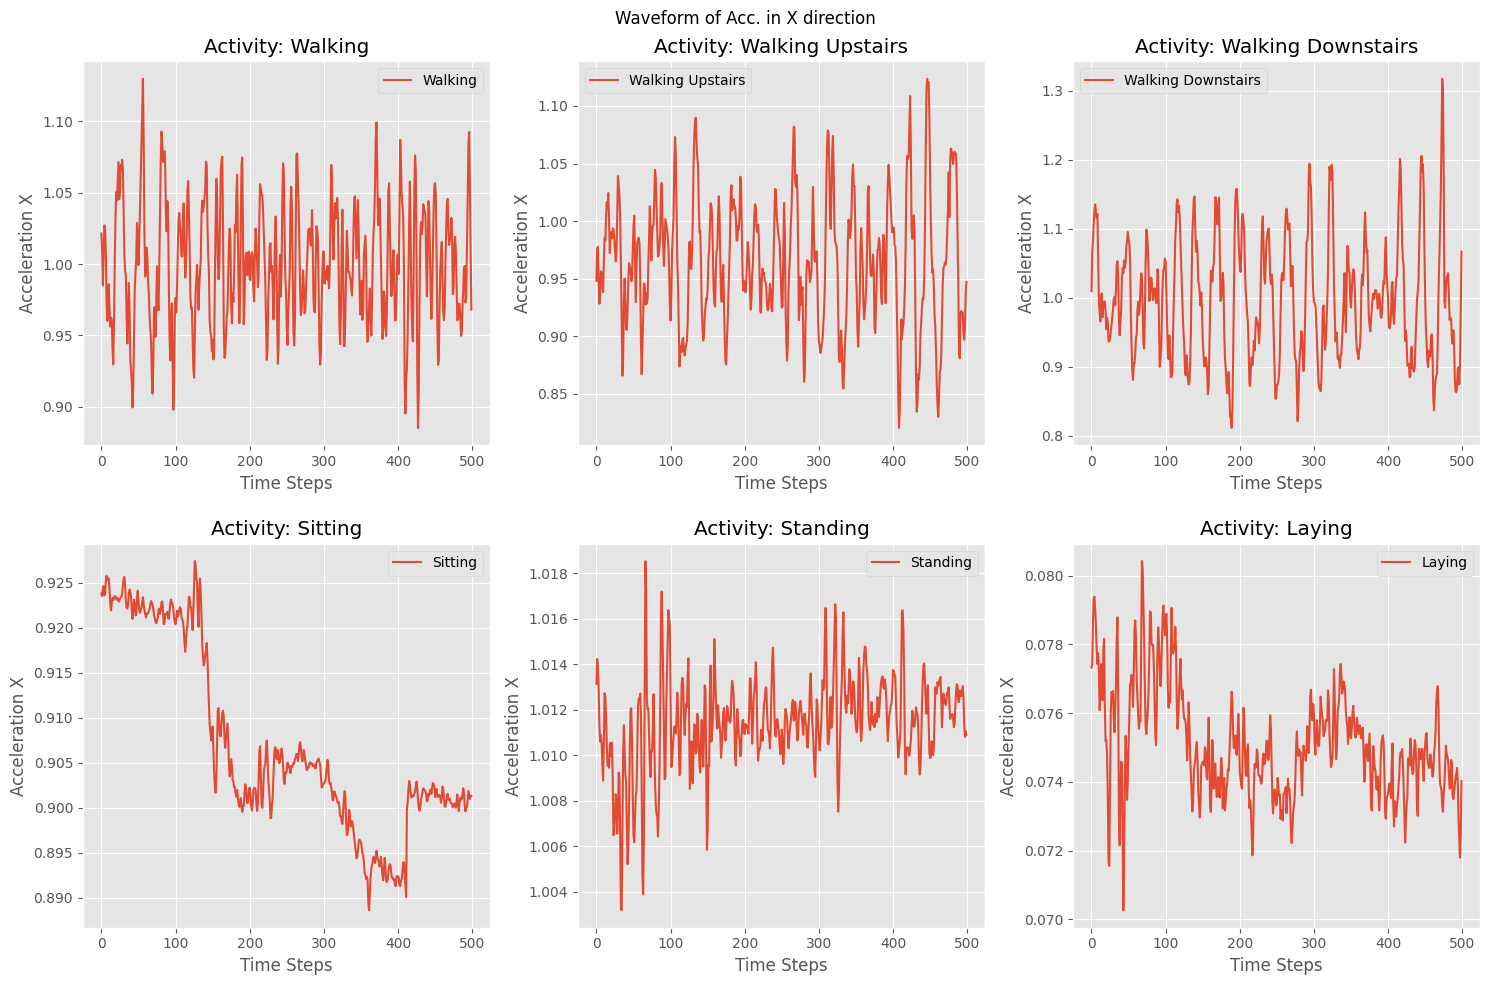

In [39]:
# Define activity classes
# Walking          -->     1
# Walking Upstairs -->     2
# Walking Downstairs -->   3
# Sitting          -->     4
# Standing         -->     5
# Laying           -->     6
activity_classes = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

# Ploting the waveform of Acc X for each activity class, taking mean over each sample
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    class_indices = np.where(y_train == i+1)[0]
    activity_data = X_train[class_indices][:, :500, 0] 
    plt.plot(np.mean(activity_data, axis=0), label=f'{activity_classes[i]}')
    plt.title(f'Activity: {activity_classes[i]}')
    plt.xlabel('Time Steps')
    plt.ylabel('Acceleration X')
    plt.suptitle("Waveform of Acc. in X direction")
    plt.tight_layout(h_pad=2)
    plt.savefig("Acc_X_subplot",dpi=300)
    plt.legend()

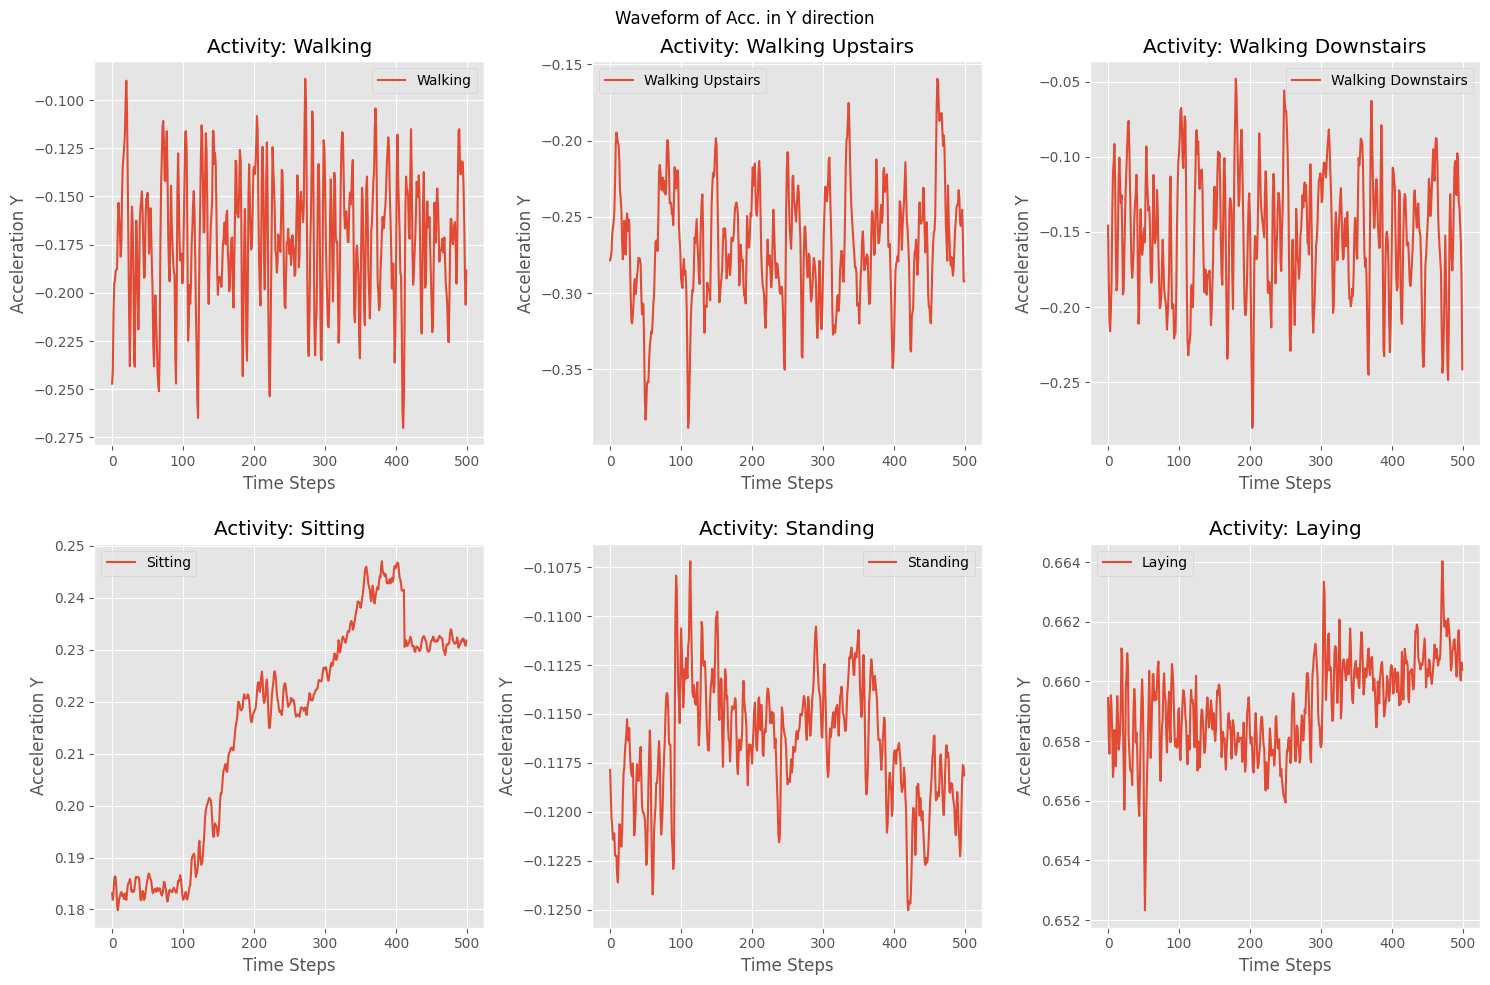

In [40]:
# Ploting the waveform of Acc Y for each activity class, taking mean over each sample
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    class_indices = np.where(y_train == i+1)[0]
    activity_data = X_train[class_indices][:, :500, 1] 
    plt.plot(np.mean(activity_data, axis=0), label=f'{activity_classes[i]}')
    plt.title(f'Activity: {activity_classes[i]}')
    plt.xlabel('Time Steps')
    plt.ylabel('Acceleration Y')
    plt.tight_layout(h_pad=2)
    plt.suptitle("Waveform of Acc. in Y direction")
    # plt.savefig("Acc_Y_subplot",dpi=300)
    plt.legend()



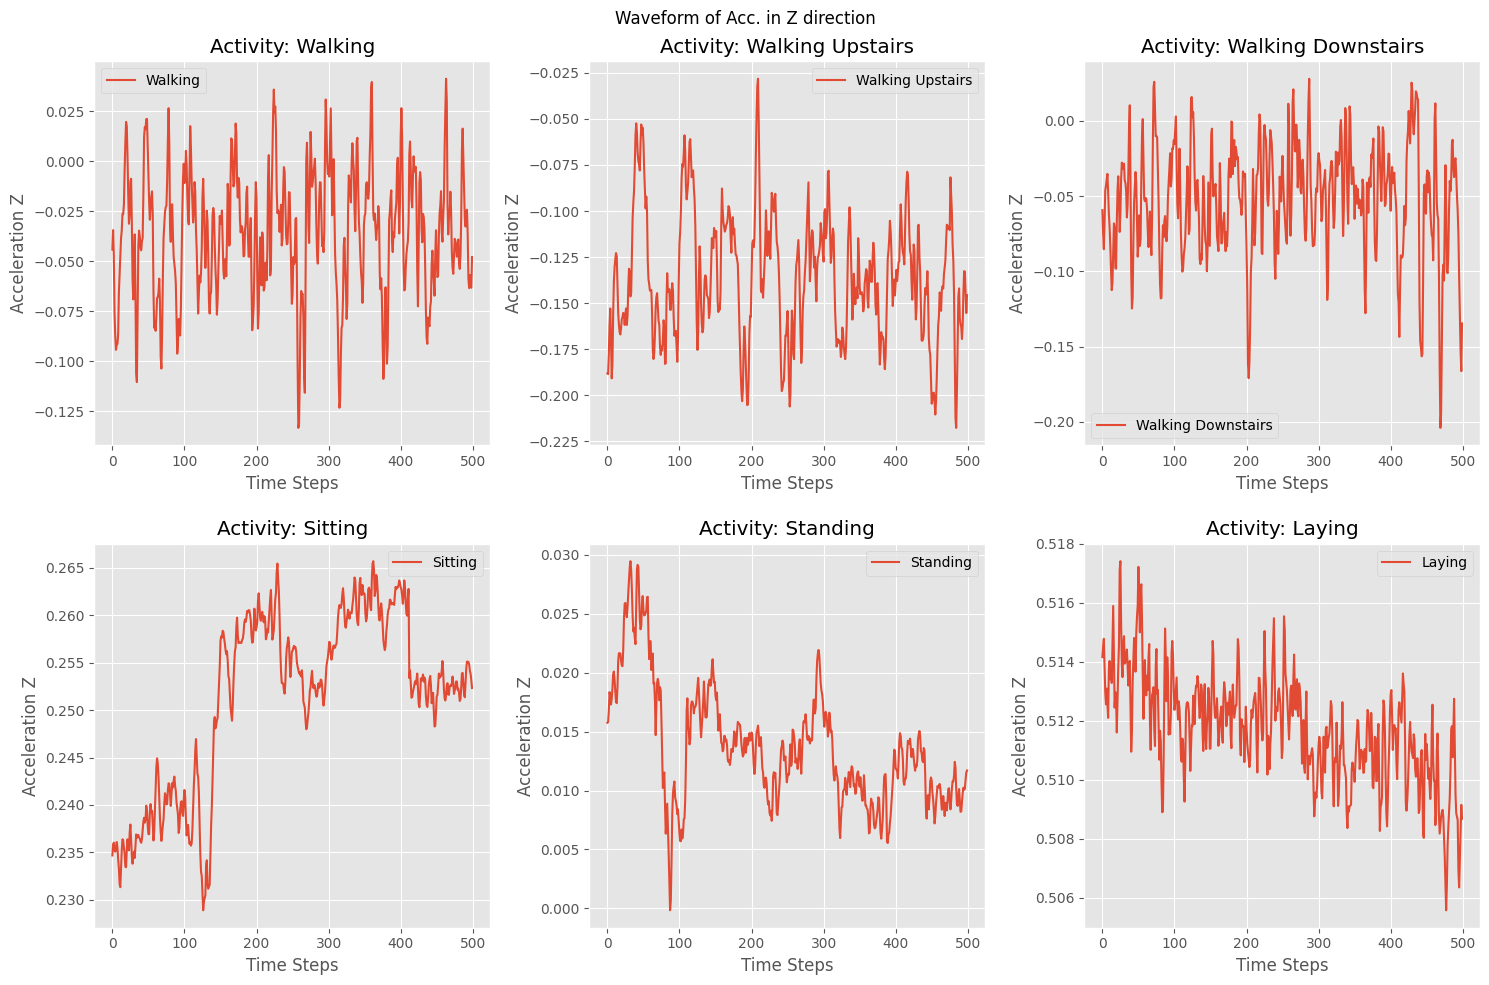

In [41]:
# Ploting the waveform of Acc Z for each activity class, taking mean over each sample
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    class_indices = np.where(y_train == i+1)[0]
    activity_data = X_train[class_indices][:, :500, 2] 
    plt.plot(np.mean(activity_data, axis=0), label=f'{activity_classes[i]}')
    plt.title(f'Activity: {activity_classes[i]}')
    plt.xlabel('Time Steps')
    plt.tight_layout(h_pad=2)
    # plt.savefig("Acc_Z_subplot",dpi=300)
    plt.suptitle("Waveform of Acc. in Z direction")
    plt.ylabel('Acceleration Z')
    plt.legend()
plt.show()

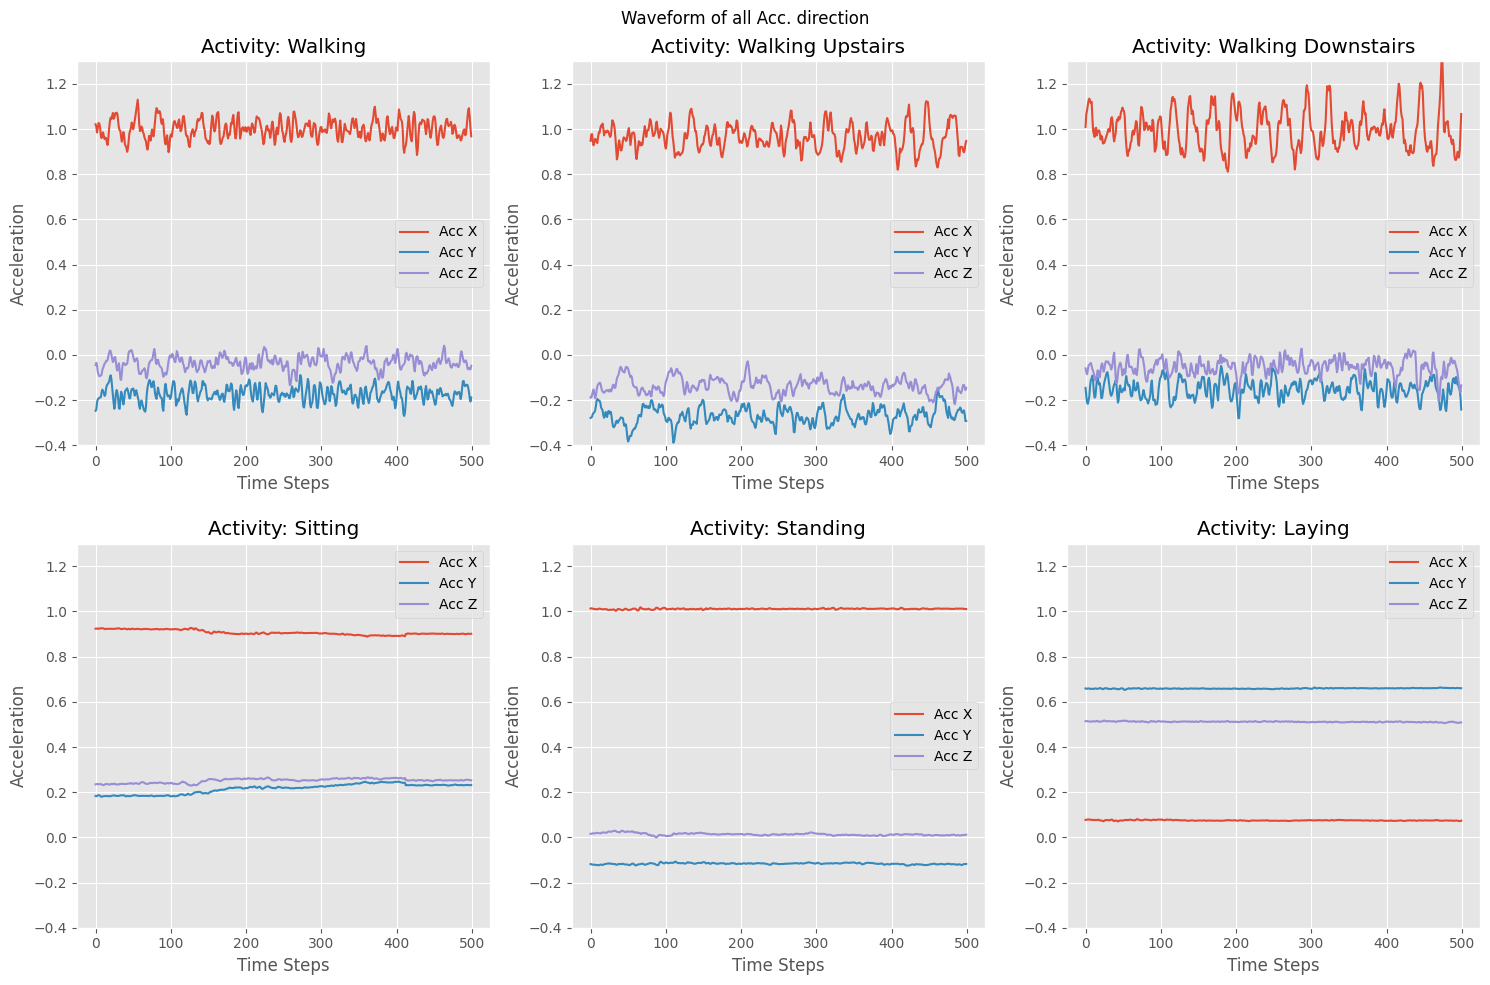

In [42]:
# Ploting the waveform of all the Acc X, Y, Z for each activity class, taking mean over each sample
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    class_indices = np.where(y_train == i+1)[0]
    activity_data_X = X_train[class_indices][:, :500, 0]  
    activity_data_Y = X_train[class_indices][:, :500, 1] 
    activity_data_Z = X_train[class_indices][:, :500, 2]  
    plt.plot(np.mean(activity_data_X, axis=0), label="Acc X")
    plt.plot(np.mean(activity_data_Y, axis=0), label="Acc Y")
    plt.plot(np.mean(activity_data_Z, axis=0), label="Acc Z")
    plt.title(f'Activity: {activity_classes[i]}')
    plt.xlabel('Time Steps')
    plt.ylim((-0.4,1.3))
    plt.tight_layout(h_pad=2)
    plt.suptitle("Waveform of all Acc. direction")
    # plt.savefig("Acc_XYZ_subplot",dpi=300)
    plt.ylabel('Acceleration')
    plt.legend()
plt.show()

## Question 2
Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration $(acc_{x}^{2}+acc_{y}^{2}+acc_{z}^{2})$
 for each activity and justify your answer. 

1. If we look carefully in the above plots from Q1, we could see that acceleration of dynamic activities have high rate of flutuations compared to static activities which have almost negligible fluctuations.
2. This could be easily be visualised and seen by looking at the total/linear acceleration plot of all the activities. The total acceleration for dynamic activities shows significant variations over time steps. In contrast, static activities have almost constant total acceleration with minimal fluctuations. 
3. These distinct pattern differences between static and dynamic activities can be used as features to train the model for classification and easily distinguish between static and dyanamic activities.
4. But it might be difficult/tedious for the model to distinguish dynamic activities and static activities amoung themselves.  

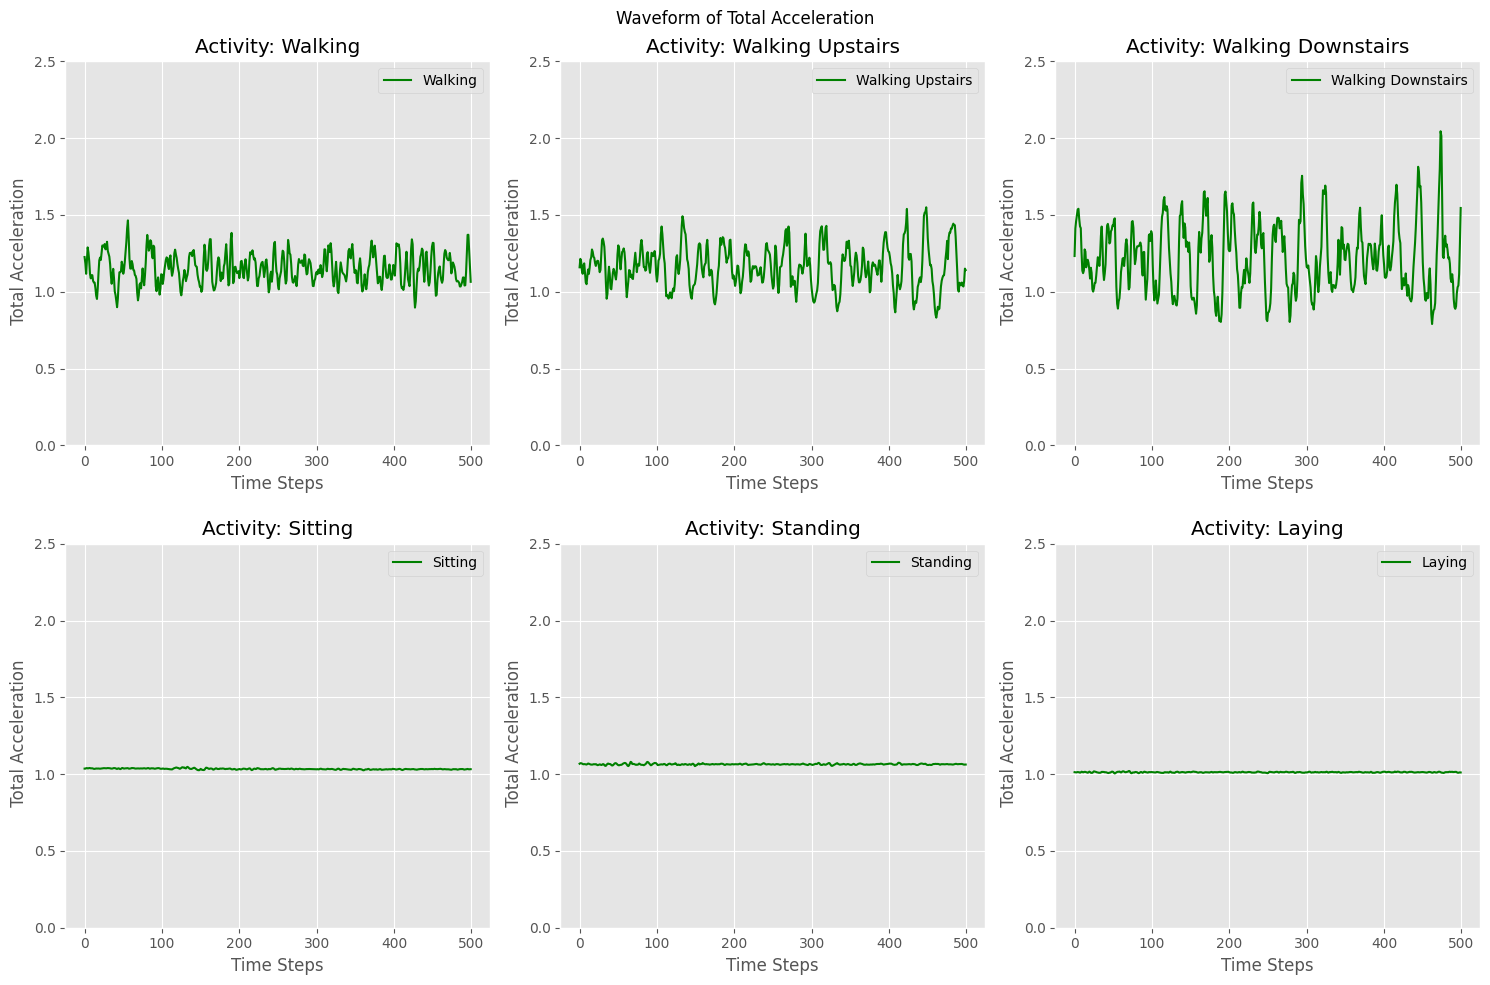

In [43]:
# Total/ Linear accelaration plot
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    class_indices = np.where(y_train == i+1)[0]
    x= X_train[class_indices][:, :500, 0]
    y= X_train[class_indices][:, :500, 1]
    z= X_train[class_indices][:, :500, 2]
    lin_acc=x**2+y**2+z**2                                  #Linear Acceleration
    plt.plot(np.mean(lin_acc, axis=0), label=f'{activity_classes[i]}',c='green')
    plt.ylim(0,2.5)
    plt.title(f'Activity: {activity_classes[i]}')
    plt.xlabel('Time Steps')
    plt.ylabel(' Total Acceleration')
    plt.tight_layout(h_pad=2)
    plt.suptitle("Waveform of Total Acceleration")
    # plt.savefig("Total_acc_subplot",dpi=300)
    plt.legend()
plt.show()

## Question 3
Train Decision Tree using trainset and report Accuracy and confusion matrix using testset.

In [44]:
# Reshaping the matrix from (_,500,3) --> (_,1500) to matrix to generate 1500 features
X_train_flat = X_train.reshape((-1,1500))
X_test_flat  = X_test.reshape((-1,1500))
X_val_flat   = X_val.reshape((-1,1500))
X_merged_flat   = X_merged.reshape((-1,1500))

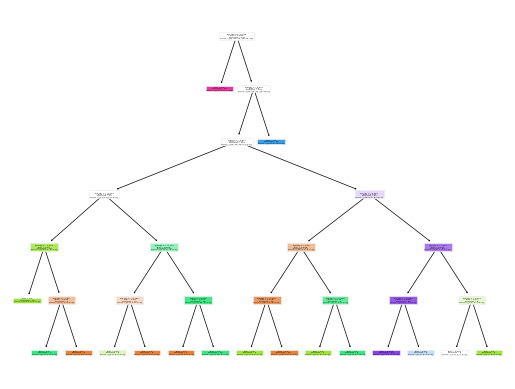

In [45]:
# Varying depths from 2 to 9
depths = list(range(2, 10))

accuracies_test = []
dt_lst=[]

# Train Decision Trees with varying depths
for depth in depths:
    
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train_flat, y_train)
    # Predicting output for X_val
    y_pred_test = dt_classifier.predict(X_val_flat)
    accuracy = accuracy_score(y_val, y_pred_test)
    accuracies_test.append(accuracy)
    

best_depth=np.argmax(accuracies_test)       #6
# Training model over best depth.
dt= DecisionTreeClassifier(max_depth=best_depth,splitter='best')
dt=dt.fit(X_merged_flat, y_merged)
plot_tree(dt,filled=True)
# plt.savefig("Decision Tree Q3", dpi=1000)
plt.show()

In [46]:
accuracy = dt.score(X_test_flat, y_test)
print("Accuracy of model ",accuracy)

Accuracy of model  0.75


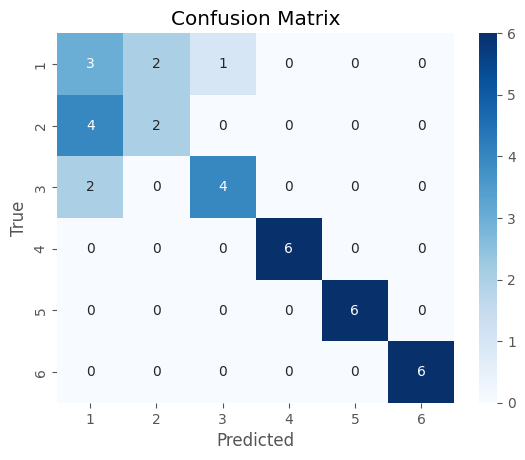

In [47]:
# Predicting output for X_test
y_pred=dt.predict(X_test_flat)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
# plt.savefig("Confusion Matrix Q3", dpi=1000)
plt.ylabel('True')
plt.show()
cm_rawData= cm

## Question4) 
Train Decision Tree with varrying depths (2-8) using trainset and report accuracy and confusion matrix using Test set. Does the accuracy changes when the depth is increased? Plot the accuracies and reason why such a result has been obtained.

1. Yes, the accuracy of a model changes when the depth is increased. The depth of a tree in models like Decision Trees determines how flexible the model is. A deeper tree can fit more complicated functions. Therefore, increasing tree depth increases performance on the training set.

2. Initially, as depth increases, both training and testing accuracies improves, indicating that the model is learning more complex representations. At a certain point, the test accuracy start get stagenent around 0.75, while the training accuracy continues to improve and eventually becomes 1. This is a sign of overfitting.

2. However increasing the flexbility/deapth we can see from the plot that the model has overfited the data giving almost 100% accuracy of training data. These types of models with greater complexity or very fine tuning on the training data led to poor generalisation because they start learning from the noise in the data rather than the actual pattern. This could be evidently seen from the accuracy plot. 

3. Increasing depth decreases bias at the expense of increasing variance. Getting the best generalization performance typically requires tuning the tree depth to achieve a proper balance between bias and variance1. So, it’s not always the case that a higher maximum depth will always lead to higher accuracy.

Accuracy on test set on models with different depth  [0.4722222222222222, 0.5833333333333334, 0.7222222222222222, 0.75, 0.6944444444444444, 0.8055555555555556, 0.75, 0.75]


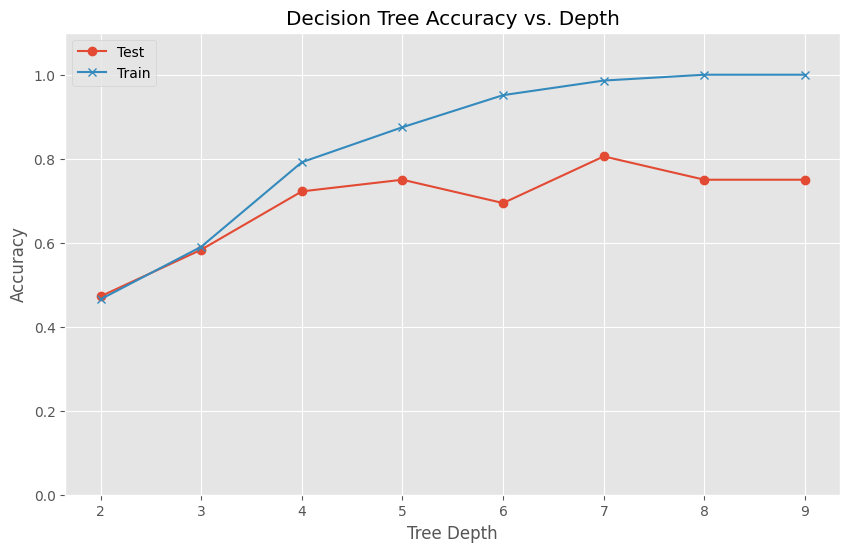

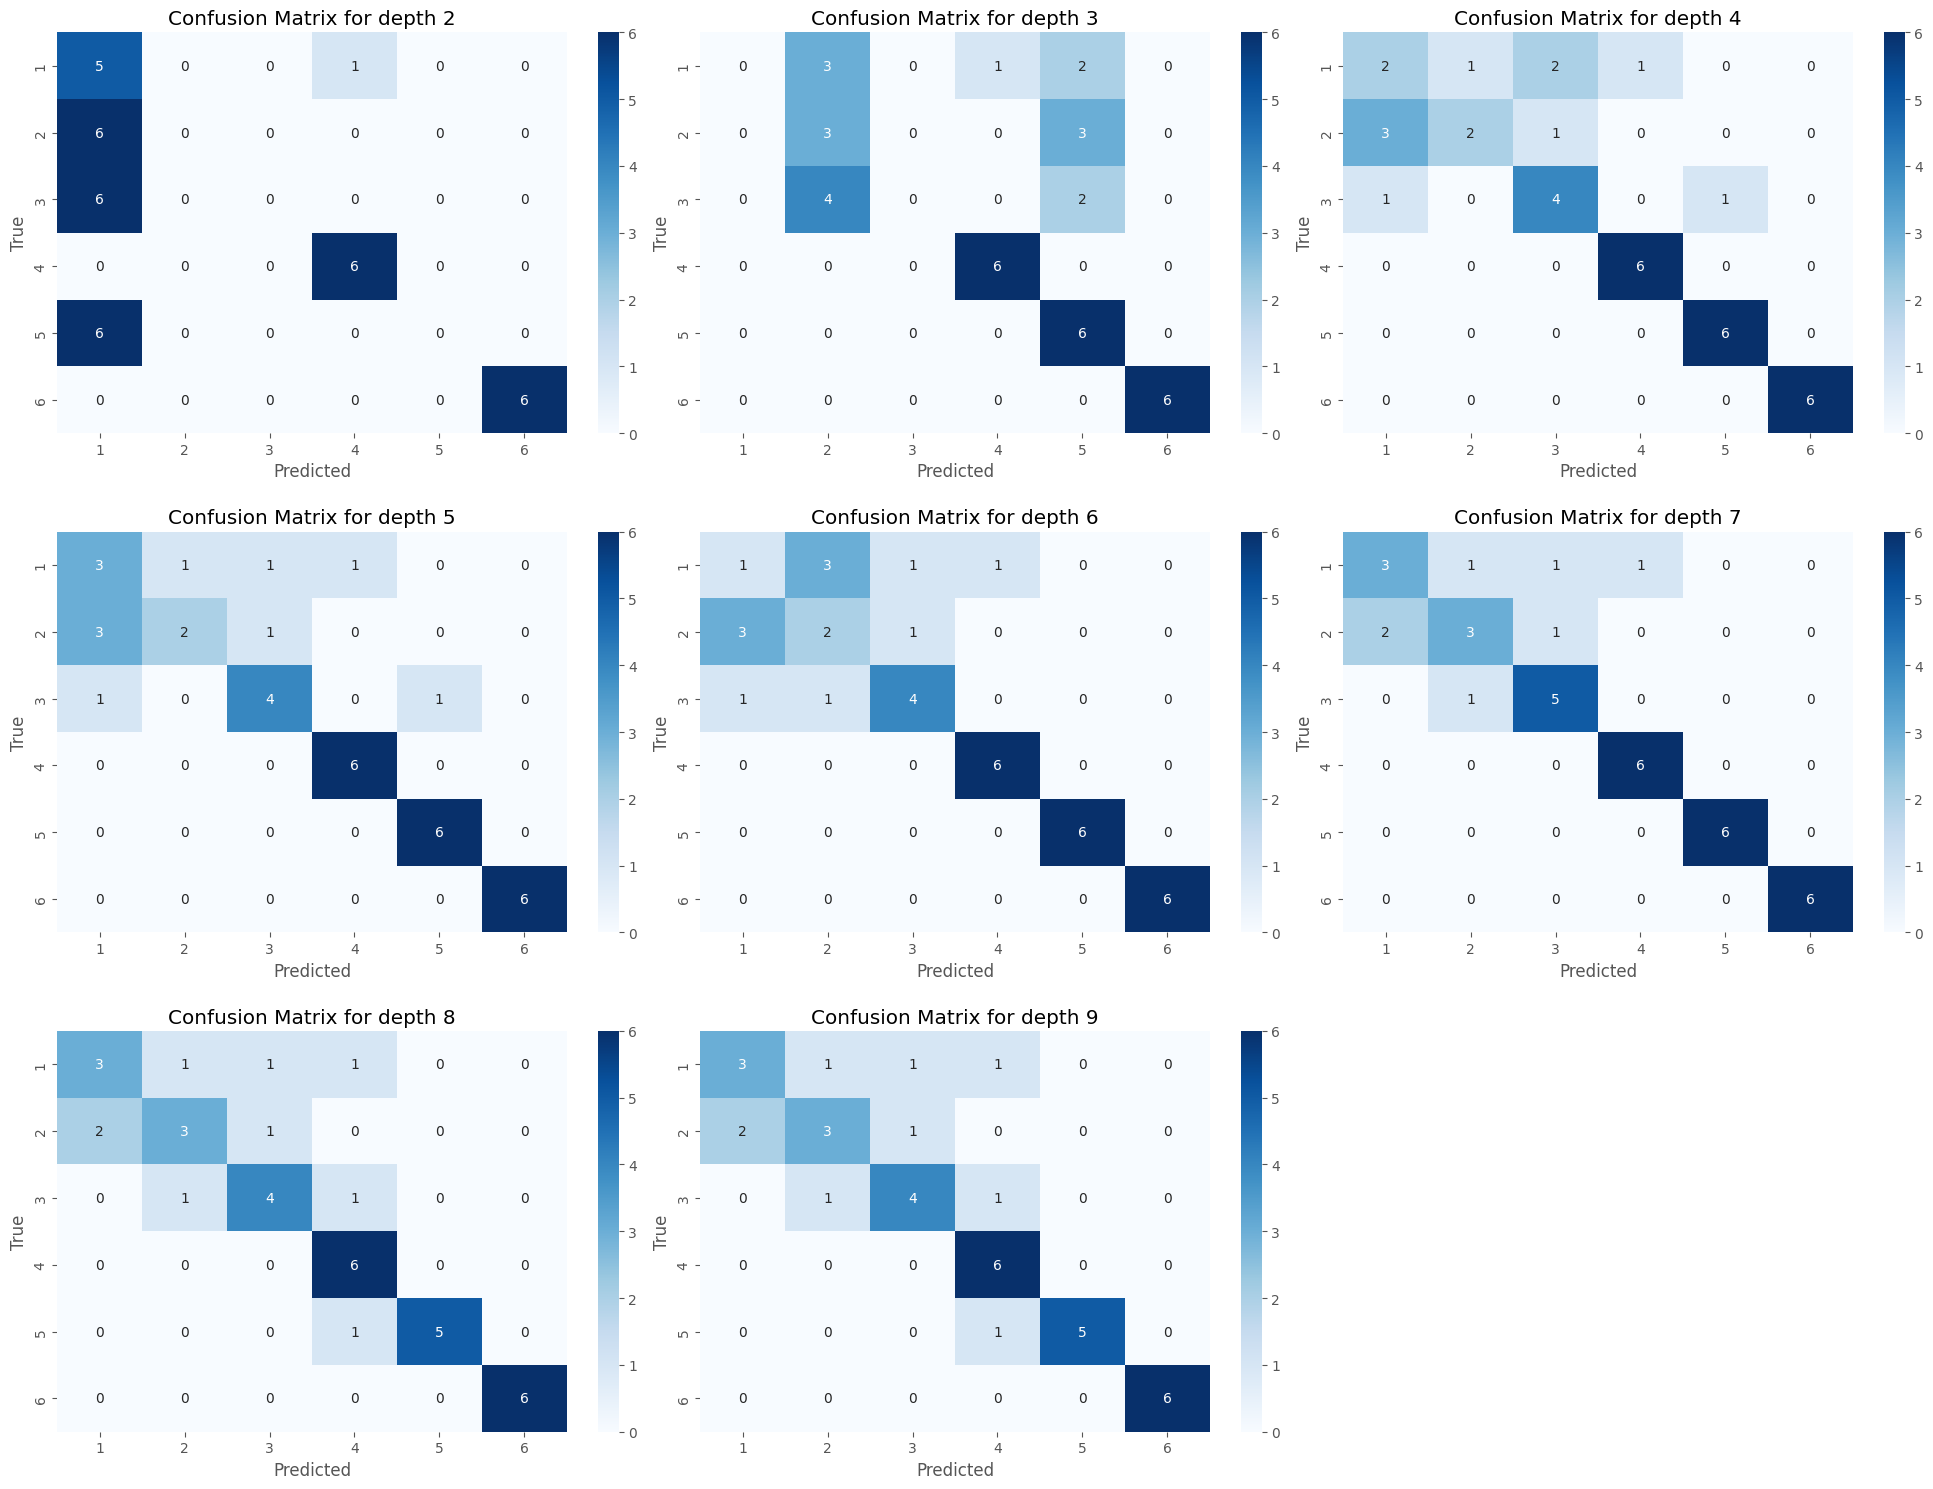

In [48]:

# Varying depths from 2 to 10
depths = list(range(2, 10))

# Lists to store accuracies and confusion matrices
accuracies_test = []
accuracies_train = []
conf_matrices = []

# Train Decision Trees with varying depths
for depth in depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_merged_flat, y_merged)
    
    #Accuracy on test
    y_pred_test = dt_classifier.predict(X_test_flat)
    accuracy = accuracy_score(y_test, y_pred_test)
    accuracies_test.append(accuracy)
    
    #Accuracy on train
    y_pred_train = dt_classifier.predict(X_merged_flat)
    accuracy = accuracy_score(y_merged,y_pred_train)
    accuracies_train.append(accuracy)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    conf_matrices.append(conf_matrix)

# Ploting accuracy Vs Depth plot
accuracy_rawData=accuracies_test
print( "Accuracy on test set on models with different depth " , accuracies_test)
plt.figure(figsize=(10,6))
plt.plot(depths, accuracies_test, marker='o',label="Test")
plt.plot(depths, accuracies_train, marker='x',label="Train")
plt.title('Decision Tree Accuracy vs. Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.ylim(0,1.1)
# plt.savefig("Accurcy vs Depth Plot Q4", dpi=1000)
plt.legend()
plt.show()

# Ploting subplot of confusion matrix
plt.figure(figsize=(20, 15))
for i, depth in enumerate(depths):
    plt.subplot(3,3,i+1)
    sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for depth {i+2}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout(h_pad=2)
# plt.savefig("Confusion Subplot Q4")
plt.show()
    

## Question 5)
Use PCA (Principal Component Analysis) on Total Acceleration $acc_{x}^2 + acc_y^2 + acc_z^2$ to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.

(144, 500)


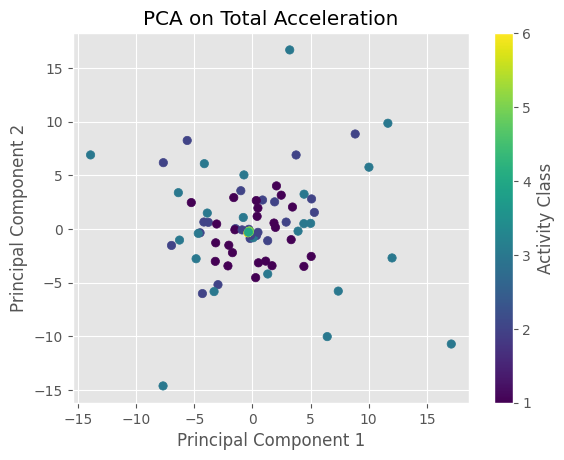

In [49]:
from sklearn.decomposition import PCA
accx = X_merged[:, :, 0]
accy = X_merged[:, :, 1]
accz = X_merged[:, :, 2]

# Evaluting total/linear acceleration
total_acceleration_2d = accx**2 + accy**2 + accz**2
print(total_acceleration_2d.shape)

#Reshaping/Flatening the total_acceleration matrix to (114,500) 
total_acceleration_2d = total_acceleration_2d.reshape((144, 500))

# Apply PCA to compress the data into two principal components
pca = PCA(n_components=2)
compressed_data = pca.fit_transform(total_acceleration_2d)

# Plot a scatter plot to visualize different classes of activities
plt.scatter(compressed_data[:, 0], compressed_data[:, 1], c=y_merged, cmap='viridis')
plt.title('PCA on Total Acceleration')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Activity Class')
plt.show()

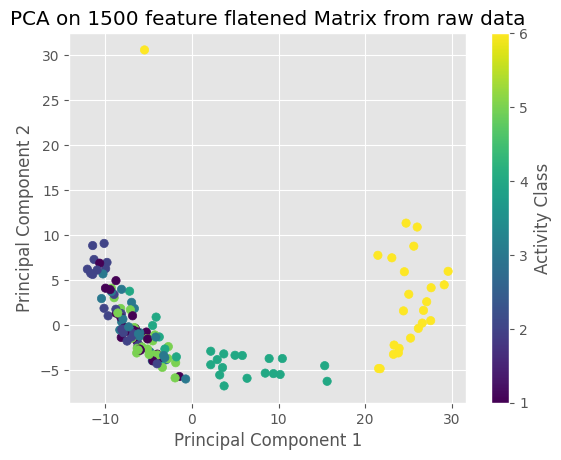

In [50]:
# Performing PCA on 1500 features generated matrix

pca = PCA(n_components=2)
compressed_data_ = pca.fit_transform(X_merged_flat)

plt.scatter(compressed_data_[:, 0], compressed_data_[:, 1], c=y_merged, cmap='viridis')
plt.title('PCA on 1500 feature flatened Matrix from raw data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Activity Class')
plt.show()

In [51]:
# ! pip install tsfel
import tsfel

# Retrieves a pre-defined feature configuration file to extract all available features
cfg = tsfel.get_features_by_domain()
print(total_acceleration_2d.shape)

# Extract features
X_train_extracted = tsfel.time_series_features_extractor(cfg, X_merged.reshape((-1,3)),fs=5,window_size=500)
X_test_extract = tsfel.time_series_features_extractor(cfg, X_test.reshape((-1,3)),fs=5,window_size=500)
print("Shape of extracted matrix ",X_train_extracted.shape)

(144, 500)
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
Shape of extracted matrix  (144, 1152)


In [17]:
print("The features extracted are as follows")
pd.get_option('display.max_columns', 2000)
print(pd.DataFrame(X_train_extracted.columns))
print(X_train_extracted.columns[23])

The features extracted are as follows
                           0
0          0_Absolute energy
1     0_Area under the curve
2          0_Autocorrelation
3            0_Average power
4                 0_Centroid
...                      ...
1147    2_Wavelet variance_5
1148    2_Wavelet variance_6
1149    2_Wavelet variance_7
1150    2_Wavelet variance_8
1151    2_Zero crossing rate

[1152 rows x 1 columns]
0_FFT mean coefficient_100


In [18]:
# Performing PCA on TSFEL featurized dataset
pca_tsfel=PCA(n_components=2)
data_new=pca_tsfel.fit_transform(X_train_extracted)
data_new= pd.DataFrame(data_new,columns=["PCA Feature 1", "PCA Feature 2"])

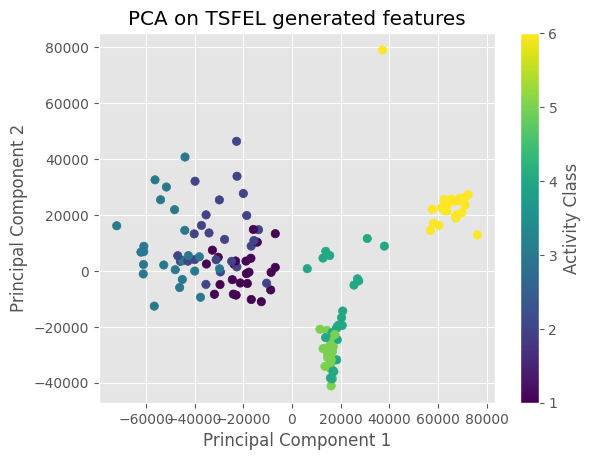

In [19]:
# Ploting scatter plot to visualise TSFEL generated dataset
plt.scatter(data_new.iloc[:, 0],data_new.iloc[:, 1], c=y_merged, cmap='viridis')
plt.title('PCA on TSFEL generated features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Activity Class')
plt.show()

 1. It can be seen that the scatter plot of PCA applied on TSFEL generated featurised matrix shows a much better clustering of distinct classes compared to scatter plot of PCA on total acceleration where different classes are highly mixed up with eachother.
 2. We can easily distinguish between different classes in featurised data while in the case of scatter plot of PCA on 1500 feature matrix we can clearly distinguish only two classes(i.e.class 4 and 6). On the otherhand in the case of PCA on total acceleration we can't distinguish even 1 class.
 3. It is very difficult to make decision boundaries on total acceleration scatter plot and 1500 feature matrix plot. On the other hand we could make much better decision boundary in the featurised data with sufficiently high accuracy.
 
 The reason behind the better distinction of classes in featurised dataset is because it makes the use of different pattern which is hidden behind the raw dataset. Pattern here mean is statistical pattern. Activities like walking upstairs, downstairs, and just walking have high variance in their data while staic activities like standing, laying or sitting have very less or negligible variance. Mean of acceleration can also be used to distinguish amoung activities. Featured matrix uses this kind to statistical data to analysis the raw data well and helps to classify different activities.

 On the other hand total acceleration is a very bad feature to classify on different activities as it vanishes the very important distinction in the dataset which is the different values of acceleration in X, Y and Z.

 Similarly in case of 1500 feature matrix it would be very bad to make decision based on acceleration values at a particular sample or instant of time because their might be cases where the accelerations of walking and sitting might come same for a instant and we make a wrong decision/split on that instant itself without considering the overall mean or variance of acceleration on overall time(i.e. 500 sample points).  

## Question 6) 
Use the features obtained from TSFEL and train a Decision Tree. Report the accuracy and confusion matrix using test set. Does featurizing works better than using the raw data? Train Decision Tree with varrying depths (2-8) and compare the accuracies obtained in Q4 with the accuracies obtained using featured trainset. Plot the accuracies obtained in Q4 against the accuracies obtained in this question.

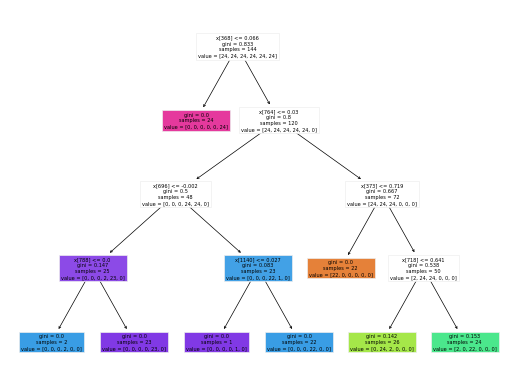

In [20]:
# Traning Decision Tree over TSFEL featurized matrix
decisionTree=DecisionTreeClassifier(max_depth=4)
decisionTree.fit(X_train_extracted,y_merged)
plot_tree(decisionTree,filled=True)
plt.savefig("Decision Tree featured matrix")

In [21]:
# Predicting output for X_test to calculate accuracy
y_pred= decisionTree.predict(X_test_extract)
accuracy= decisionTree.score(X_test_extract,y_test)
print(accuracy)

0.9166666666666666


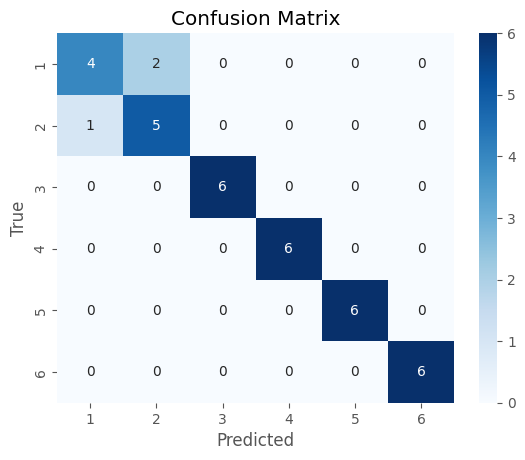

In [22]:
# Ploting confusion matrix to visualise the prediction done by the model
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
cm_featured=cm

[0.5, 0.75, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888]


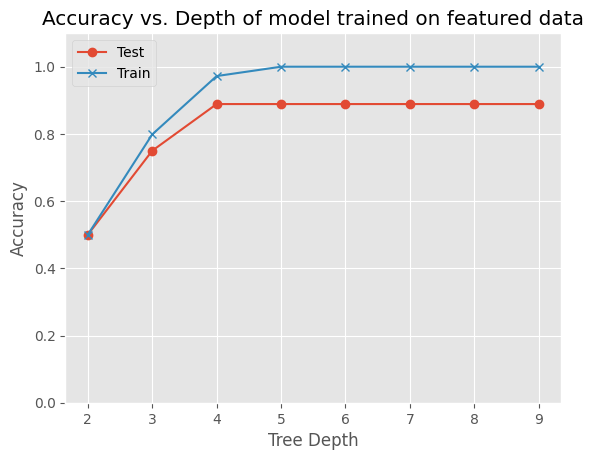

In [23]:
# Varying depths from 2 to 10
depths = list(range(2, 10))

# Lists to store accuracies and confusion matrices
accuracies_test = []
accuracies_train = []
conf_matrices = []

# Train Decision Trees with varying depths
for depth in depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train_extracted, y_merged)
    
    # Accuracy on the test set
    y_pred_test = dt_classifier.predict(X_test_extract)
    accuracy = accuracy_score(y_test, y_pred_test)
    accuracies_test.append(accuracy)
    
    #Accuracy on train set
    y_pred_train = dt_classifier.predict(X_train_extracted)
    accuracy = accuracy_score(y_merged,y_pred_train)
    accuracies_train.append(accuracy)

print(accuracies_test)

plt.plot(depths, accuracies_test, marker='o',label="Test")
plt.plot(depths, accuracies_train, marker='x',label="Train")
plt.title('Accuracy vs. Depth of model trained on featured data')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.ylim(0,1.1)
plt.legend()
plt.show()


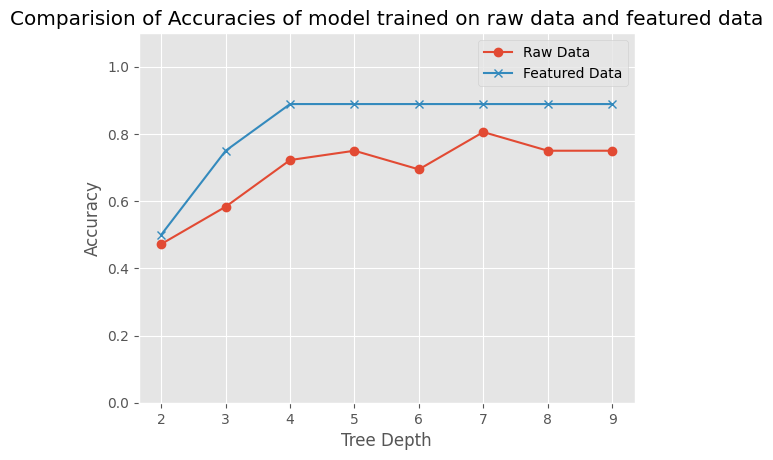

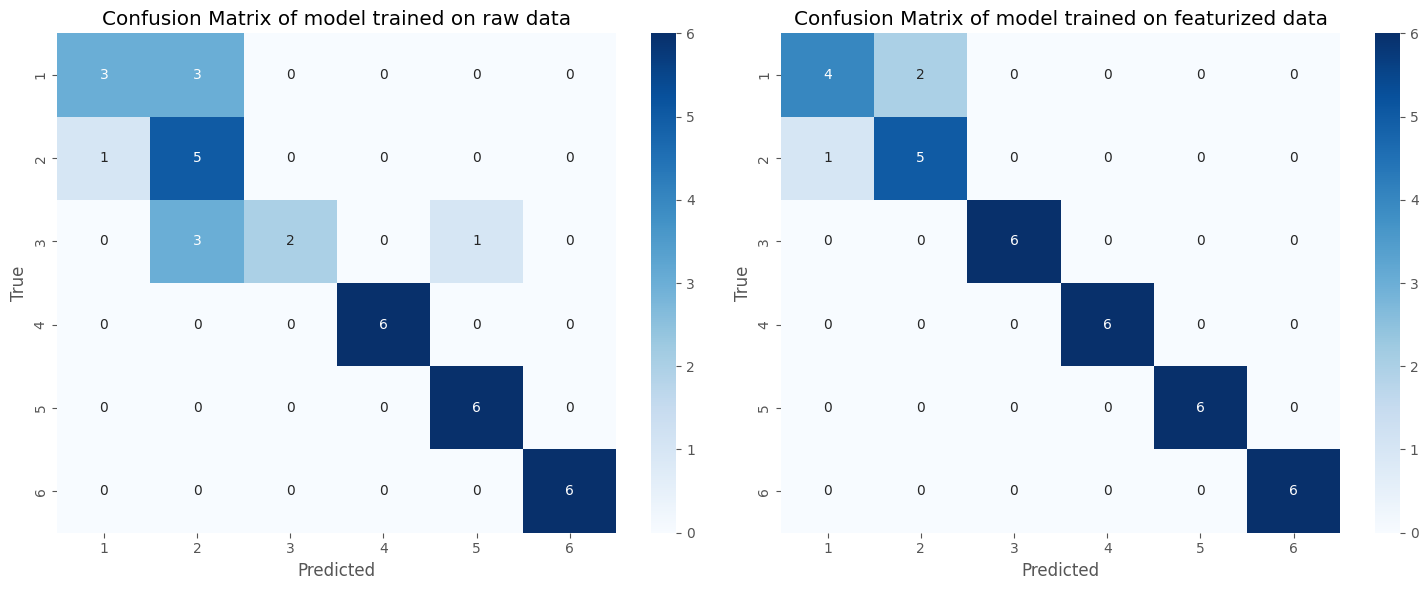

In [24]:
# Plotting accuracies of raw data and featured data
plt.plot(depths, accuracy_rawData, marker='o',label="Raw Data")
plt.plot(depths, accuracies_test, marker='x',label="Featured Data")
plt.title('Comparision of Accuracies of model trained on raw data and featured data')
plt.ylim(0,1.1)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
sns.heatmap(cm_rawData, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix of model trained on raw data')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1,2,2)
sns.heatmap(cm_featured, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix of model trained on featurized data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout(h_pad=2)
plt.show()

1. Yes, featurized data works better than raw data. We can conform this by looking at the above line plot depicting comparision of accuracies of test data set on the models trained on raw data and featurized data.
2. The model trained on featurized data performs better than the model trained with raw data.
3. We can also compare the confusion matrix generated by both the models on the test set. We see that featurized matrix model is able to predict almost all the activities correctly.
3. The reason behind this is discussed in Q5 solution.
4. Their is a better distinction of classes in featurised dataset as it makes the use of different statistical measures and pattern which is hidden behind the raw dataset. Features like entropy, variance ,autocorrelation ,absolute energy and many other.

### Question 7)
Are there any participants/ activitivies where the Model performace is bad? If Yes, Why?

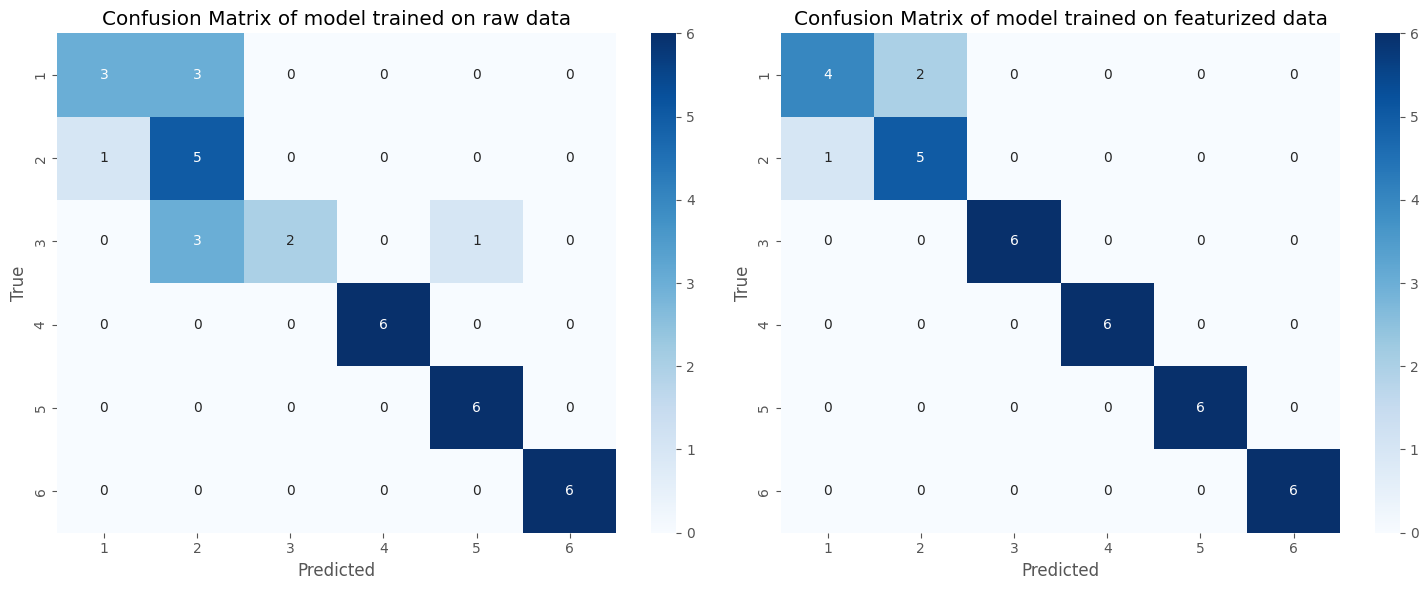

In [25]:
plt.figure(figsize=(15, 6))

# Plotting confusion Matrix of model trained on raw data
plt.subplot(1,2,1)
sns.heatmap(cm_rawData, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix of model trained on raw data')
plt.xlabel('Predicted')
plt.ylabel('True')

# Plotting confusion Matrix of model trained on featurized data
plt.subplot(1,2,2)
sns.heatmap(cm_featured, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix of model trained on featurized data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout(h_pad=2)
plt.show()


`Model trained on`
1. `Raw Dataset` : 
If we see static activities like sitting, laying and standing, the model is able predict them very well with almost 100% accuracy. But there seems very lot confusion or wrong predictions when it comes to predict on dynamic activities like walking, walking upstaires and downstairs.

2. `Featurized Dataset` :
This model able to predict almost all the samples correctly with just 3 mismatch amoung dynamic activities.

It is important to notice that most of the confusion in both the models is happening amoung the dynamic activities itself i.e. the models are not able to distinguish between dynamic activities.
So it could be seen that model performance is bad when it comes to distinguish or predict upon the dynamic activies.

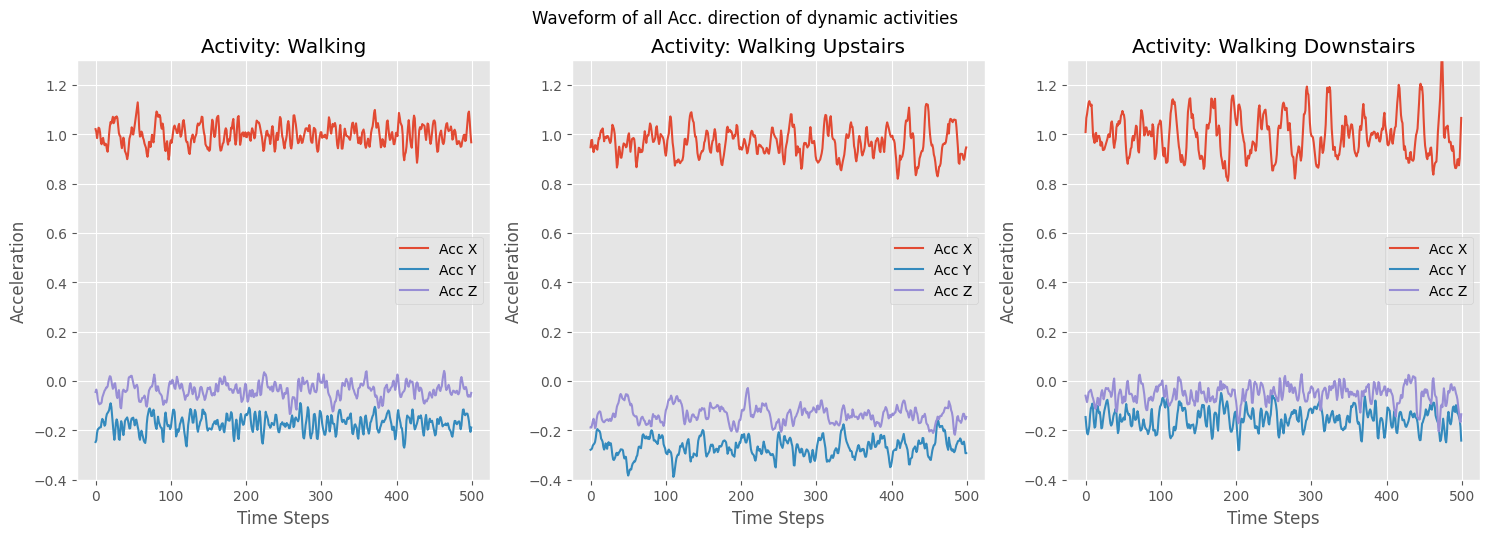

In [26]:
plt.figure(figsize=(15, 10))
for i in range(3):
    plt.subplot(2, 3, i+1)
    class_indices = np.where(y_train == i+1)[0]
    activity_data_X = X_train[class_indices][:, :500, 0]  
    activity_data_Y = X_train[class_indices][:, :500, 1] 
    activity_data_Z = X_train[class_indices][:, :500, 2]  
    plt.plot(np.mean(activity_data_X, axis=0), label="Acc X")
    plt.plot(np.mean(activity_data_Y, axis=0), label="Acc Y")
    plt.plot(np.mean(activity_data_Z, axis=0), label="Acc Z")
    plt.title(f'Activity: {activity_classes[i]}')
    plt.xlabel('Time Steps')
    plt.ylim((-0.4,1.3))
    plt.tight_layout(h_pad=2)
    plt.suptitle("Waveform of all Acc. direction of dynamic activities")
    plt.savefig("Acc_XYZ_subplot",dpi=300)
    plt.ylabel('Acceleration')
    plt.legend()
plt.show()

### Reason
The reason for bad performance can be seen from the above waveforms of dynamic activities. We can observe that the magnitude of acceleration in all direction(X, Y, Z) are almost same or in the same range and all of them have some fluctuation which are also more or less same. Since all the activities are similar i.e. of walking and having such similar dataset it could be difficult for our models to accurately predict them with 100% accuracy. Still the featurized dataset that we created is able to do a good job in distinguish the dynamic activities with very less mismatches.

# Deployment
For this exercise marks will not depend on what numbers you get but on the process you followed Utilize apps like Physics Toolbox Suite from your smartphone to collect your data in .csv/.txt format. Ensure at least 15 seconds of data is collected, trimming edges to obtain 10 seconds of relevant data. Collect 3-5 samples per activity class and report accuracy using both featurized and raw data. You have to train on UCI dataset (You can use the entire dataset if you want) and test it on the data that you have collected and report the accuracy and confusion matrix. Test your model's performance on the collected data, explaining why it succeeded or failed.

1. In this experiment, we meticulously followed a structured process for collecting, preprocessing, and testing data using the `Physics Toolbox Suite` app on my smartphone. To maintain consistency, the phone was consistently positioned and aligned across all activities, and a careful calibration ensured accurate readings.

2. 5 samples were collected for each activity. Each activity was recorded for a minimum of 15 seconds, with the dataset then trimmed to a standardized 10-second duration, resulting in 500 data samples at a 50Hz sampling rate.

3. The collected raw data was stored in .csv format, allowing for easy manipulation and analysis. To account for variations in sampling rates, Resampling is performed to achieve a consistent 50Hz frequency (20ms interval) using the resample method.

4. Subsequently, a batch process is applied to multiple CSV files, each representing different activity classes. The data from these files is loaded into individual DataFrames, and the list of DataFrames is converted into a 3D NumPy array, where each slice along the first dimension
corresponds to a specific activity class.

5. The resulting 3D array is suitable for input to a machine learning model, where each slice corresponds to a specific activity class with 500 samples and three features .Activity labels are manually assigned to each class, forming a labelled dataset ready for testing a machine learning model.

6. Throughout the process, attention was paid to factors like consistent phone alignment and minimal external interference. The success or failure of the model in classifying the activities was analysed, taking into account the intricacies of the data collection process. This rigorous approach ensures the reliability of the experiment and provides insights into the model's adaptability to real-world scenarios.

In [27]:
import pandas as pd
import numpy as np
# !pip install pyarrow
# List of CSV file names
csv_files = ['.\Collected Data\standing_1.csv', '.\Collected Data\standing_2.csv', '.\\Collected Data\\standing_3.csv', '.\\Collected Data\\standing_4.csv', 
'.\Collected Data\standing_5.csv',
'.\Collected Data\sitting_1.csv', 
'.\Collected Data\sitting_2.csv', 
'.\Collected Data\sitting_3.csv', 
'.\Collected Data\sitting_4.csv', 
'.\Collected Data\sitting_5.csv', 
'.\Collected Data\laying_1.csv', 
'.\Collected Data\laying_2.csv', 
'.\Collected Data\laying_3.csv', 
'.\Collected Data\laying_4.csv', 
'.\Collected Data\laying_5.csv', 
'.\Collected Data\walking_1.csv',
'.\Collected Data\walking_2.csv',
'.\Collected Data\walking_3.csv',
'.\Collected Data\walking_4.csv',
'.\Collected Data\walking_5.csv',
'.\\Collected Data\\Up_Stairs1.csv',
'.\\Collected Data\\Up_stairs2.csv', 
'.\\Collected Data\\Up_stairs3.csv' ,
'.\\Collected Data\\Up_stairs4.csv',
'.\\Collected Data\\Up_stairs5.csv',
'.\\Collected Data\\Down_stairs1.csv',
'.\\Collected Data\\Down_stairs2.csv',
'.\\Collected Data\\Down_Stairs3.csv',
'.\\Collected Data\\Down_stairs4.csv',
'.\\Collected Data\\Down_stairs5.csv' ]
# Initializean empty list to hold dataframes
dfs = []

# Read each CSV file and append to the list
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Convert list of dataframes to 3D numpy array
collected_X_test = np.array([df.values for df in dfs])

print(collected_X_test.shape)  # Should print (30, 500, 3)
print(collected_X_test[0])
collected_y_test=np.array([5,5,5,5,5,4,4,4,4,4,6,6,6,6,6,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,])
print(collected_y_test.shape)

(30, 500, 3)
[[ 0.99543077 -0.01433846  0.14381538]
 [ 0.99123333 -0.01251111  0.15283333]
 [ 0.9921     -0.01498889  0.15946667]
 ...
 [ 0.997975   -0.0136125   0.1226    ]
 [ 0.99687778 -0.01446667  0.12561111]
 [ 0.996675   -0.0150125   0.1251375 ]]
(30,)


In [28]:
# Merging whole UCI dataset into one.
X_all=np.concatenate((X_train,X_val,X_test),axis=0)
y_all=np.concatenate((y_train,y_val,y_test),axis=0)


# Generating 1500 features be flatening raw data
X_all_flat=X_all.reshape((-1,1500))
collected_X_test_flat= collected_X_test.reshape((-1,1500)) 
# print(X_all.shape)

X_lin_acc= X_all[:,:,0]**2 + X_all[:,:,1]**2 + X_all[:,:,2]**2
collected_lin_acc= collected_X_test[:,:,0]**2 +collected_X_test[:,:,1]**2 +collected_X_test[:,:,2]**2


## Sklearn Model Trained on flatened 1500 Features

[0.4666666666666667, 0.5333333333333333, 0.5666666666666667, 0.5666666666666667, 0.5333333333333333, 0.5, 0.5, 0.5]


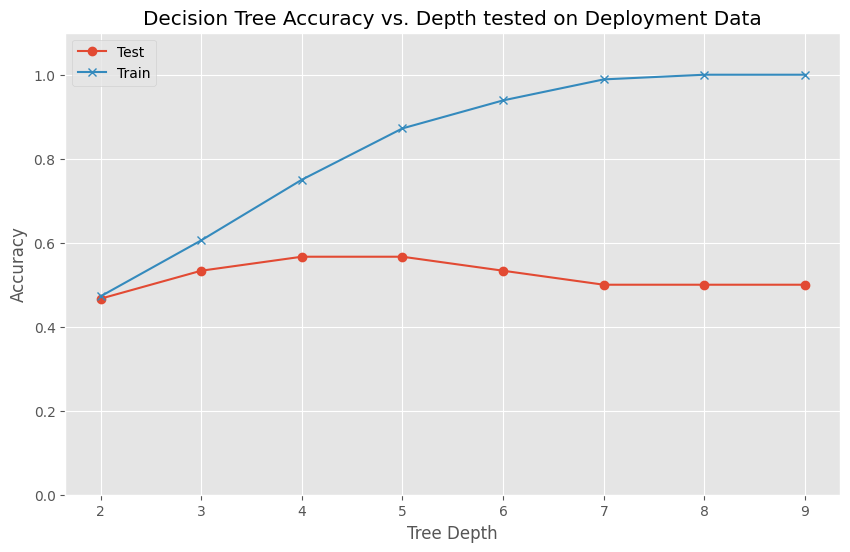

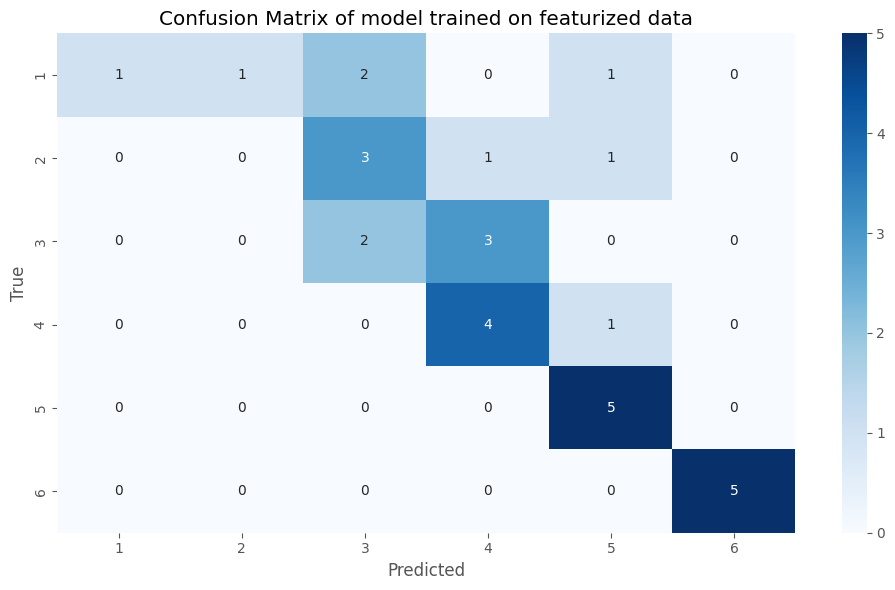

In [29]:

# Varying depths from 2 to 8
depths = list(range(2, 10))

# Lists to store accuracies and confusion matrices
accuracies_test = []
accuracies_train = []
conf_matrices = []

# Train Decision Trees with varying depths
for depth in depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_all_flat,y_all)
    
    # Calculate accuracy on train
    y_pred_train = dt_classifier.predict(X_all_flat)
    accuracy = accuracy_score(y_all, y_pred_train)
    accuracies_train.append(accuracy)
    
    #Accuracy on test
    y_pred_test = dt_classifier.predict(collected_X_test_flat)
    accuracy = accuracy_score(collected_y_test,y_pred_test)
    accuracies_test.append(accuracy)
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(collected_y_test, y_pred_test)
    conf_matrices.append(conf_matrix)


print(accuracies_test)
# Plot accuracies
plt.figure(figsize=(10,6))
plt.plot(depths, accuracies_test, marker='o',label="Test")
plt.plot(depths, accuracies_train, marker='x',label="Train")
plt.title('Decision Tree Accuracy vs. Depth tested on Deployment Data')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.ylim(0,1.1)
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(conf_matrices[np.argmax(accuracies_test)], annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5,6], yticklabels=[1,2,3,4,5,6])
plt.title('Confusion Matrix of model trained on featurized data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout(h_pad=2)
plt.show()
# dt_1500_features=DecisionTreeClassifier(max_depth=3)
# dt_1500_features.fit(X_all_flat,y_all)
# dt_1500_features.score(collected_X_train.reshape((-1,1500)),colleted_y_train)

## Sklearn Model trained on 2D Linear Acceleration

[0.3333333333333333, 0.4666666666666667, 0.4, 0.36666666666666664, 0.36666666666666664, 0.4, 0.3333333333333333, 0.3333333333333333]


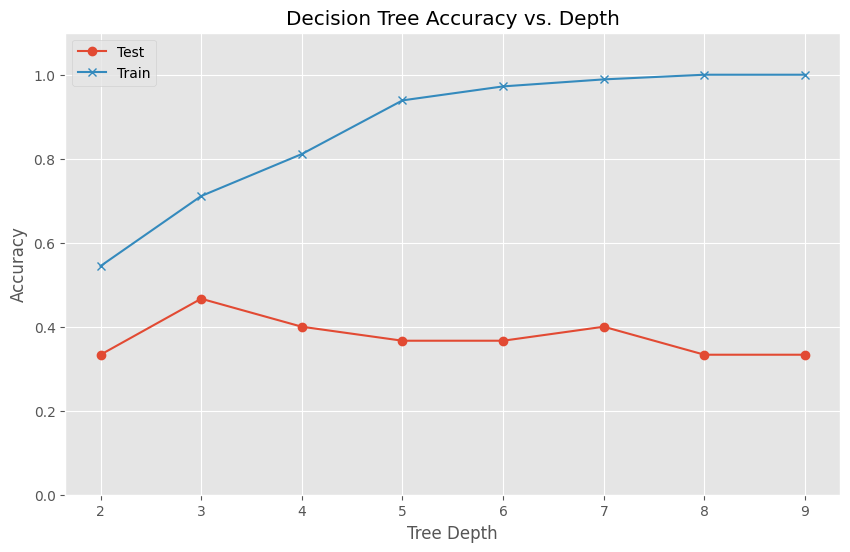

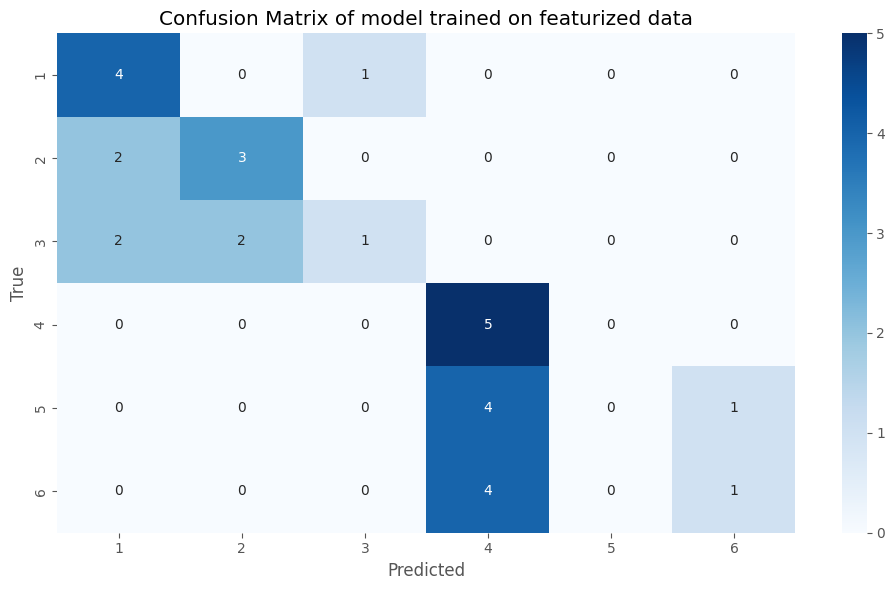

In [30]:

# Varying depths from 2 to 8
depths = list(range(2, 10))

# Lists to store accuracies and confusion matrices
accuracies_test = []
accuracies_train = []
conf_matrices = []

# Train Decision Trees with varying depths
for depth in depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_lin_acc, y_all)
    
    # Calculate accuracy on train
    y_pred_train = dt_classifier.predict(X_lin_acc)
    accuracy = accuracy_score(y_all, y_pred_train)
    accuracies_train.append(accuracy)
    
    #Accuracy on test
    y_pred_test = dt_classifier.predict(collected_lin_acc)
    accuracy = accuracy_score(collected_y_test,y_pred_test)
    accuracies_test.append(accuracy)
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(collected_y_test, y_pred_test)
    conf_matrices.append(conf_matrix)

print(accuracies_test)
# Plot accuracies
plt.figure(figsize=(10,6))
plt.plot(depths, accuracies_test, marker='o',label="Test")
plt.plot(depths, accuracies_train, marker='x',label="Train")
plt.title('Decision Tree Accuracy vs. Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.ylim(0,1.1)
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(conf_matrices[np.argmax(accuracies_test)], annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5,6], yticklabels=np.unique(y_test))
plt.title('Confusion Matrix of model trained on featurized data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout(h_pad=2)
plt.show()


## Featurizing Collected Data using TSFEL

In [31]:
cfg = tsfel.get_features_by_domain()
# print(total_acceleration_2d.shape)

# Extract features using TSFEL for collected dataset
print(X_all.shape)
print(X_all.reshape((-1,3)).shape)
X_extracted_train = tsfel.time_series_features_extractor(cfg, X_all.reshape((-1,3)),fs=5,window_size=500)
collected_extracted_test = tsfel.time_series_features_extractor(cfg, collected_X_test.reshape((-1,3)),fs=5,window_size=500)
print("Shape of extracted matrix ",X_extracted_train.shape)

(180, 500, 3)
(90000, 3)
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
Shape of extracted matrix  (180, 1152)


## Sklearn Model trained on featurized dataset

[0.5, 0.6666666666666666, 0.7, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667]


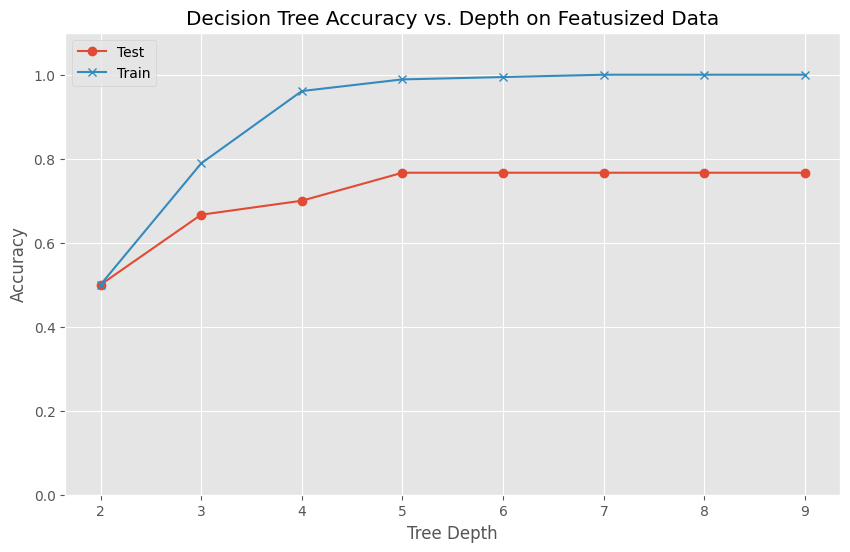

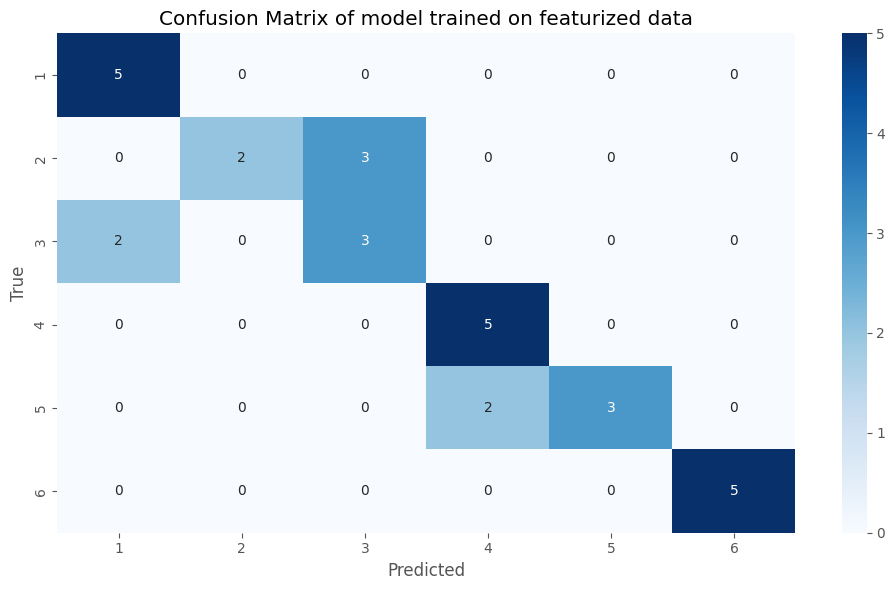

In [32]:
# Varying depths from 2 to 9
depths = list(range(2, 10))

# Lists to store accuracies and confusion matrices
accuracies_test = []
accuracies_train = []
conf_matrices = []

# Train Decision Trees with varying depths
for depth in depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_extracted_train, y_all)
    

    # Calculate accuracy on train
    y_pred_train = dt_classifier.predict(X_extracted_train)
    accuracy = accuracy_score(y_all, y_pred_train)
    accuracies_train.append(accuracy)
    
    #Accuracy on test
    y_pred_test = dt_classifier.predict(collected_extracted_test)
    accuracy = accuracy_score(collected_y_test,y_pred_test)
    accuracies_test.append(accuracy)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(collected_y_test, y_pred_test)
    conf_matrices.append(conf_matrix)

print(accuracies_test)
# Plot accuracies
plt.figure(figsize=(10,6))
plt.plot(depths, accuracies_test, marker='o',label="Test")
plt.plot(depths, accuracies_train, marker='x',label="Train")
plt.title('Decision Tree Accuracy vs. Depth on Featusized Data')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.ylim(0,1.1)
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(conf_matrices[np.argmax(accuracies_test)], annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5,6], yticklabels=[1,2,3,4,5,6])
plt.title('Confusion Matrix of model trained on featurized data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout(h_pad=2)
plt.show()


In [33]:
from base import *
from metrics import *
from utils import *

# Deployment of our own Decision Tree model built from scratch 

We have performed PCA on the test and train dataset before training the model. This is because our model was taking lot of time to run the code and get trained when we used dataset with high number of features. Therefore we decided to reduce the number of features by using PCA

Accuracy of model at different depth are as follows
[0.26666666666666666, 0.3333333333333333, 0.3333333333333333, 0.43333333333333335, 0.5, 0.4666666666666667, 0.43333333333333335, 0.43333333333333335]


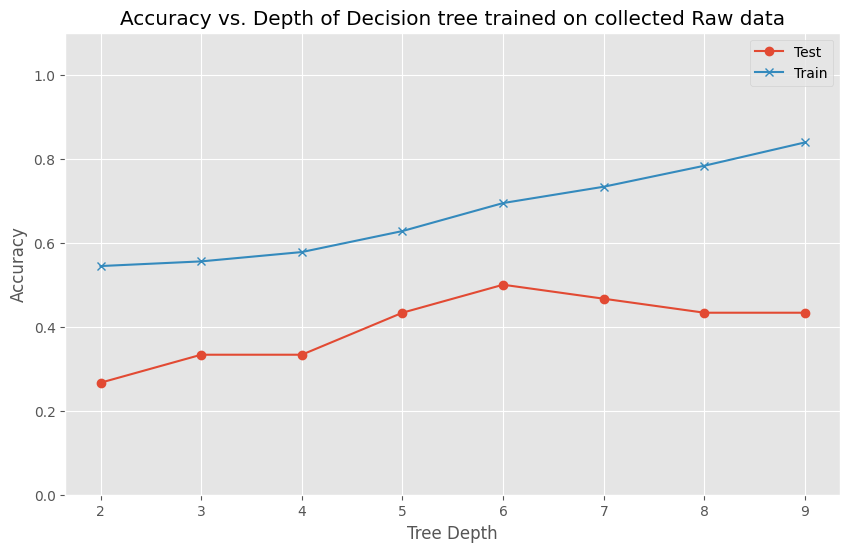

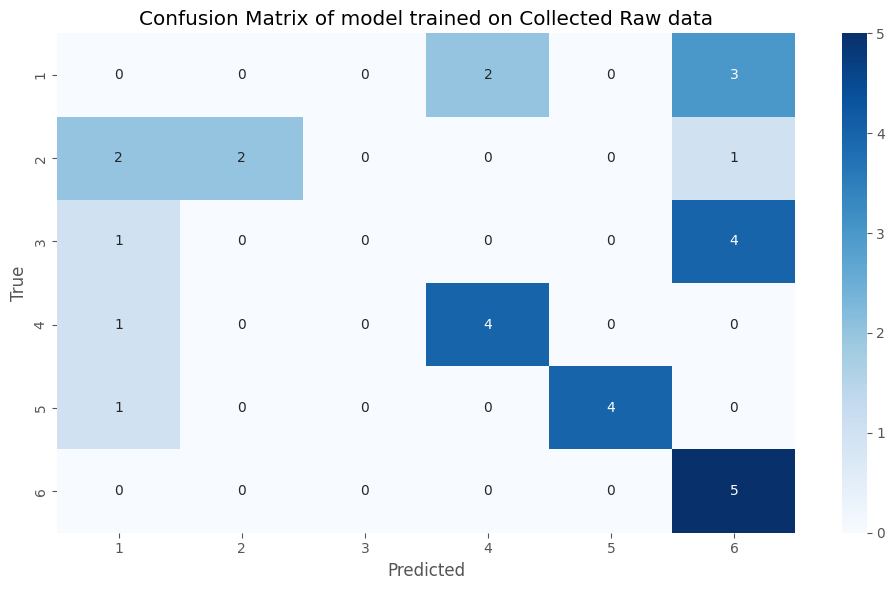

In [34]:
# Varying depths from 2 to 9
depths = list(range(2, 10))

# Lists to store accuracies and confusion matrices
accuracies_test = []
accuracies_train = []
conf_matrices = []

y_new=pd.Series(y_all.astype(str))
y_new.name="Column"
y_collected_new=pd.Series(collected_y_test.astype(str))
y_collected_new.name="Column"
pca=PCA(n_components=2)
collected_X_test_flat=pca.fit_transform(collected_X_test_flat)
X_all_flat=pca.fit_transform(X_all_flat)
collected_X_test_flat=pd.DataFrame(collected_X_test_flat)
collected_X_test_flat.columns=["Col1", "Col2"]
X_all_flat=pd.DataFrame(X_all_flat)
X_all_flat.columns=["Col1", "Col2"]

for depth in depths:
    dt_classifier = DecisionTree('entropy',depth)
    dt_classifier.fit(X_all_flat, y_new)
      
    # Calculate accuracy on test
    y_pred_test = dt_classifier.predict(collected_X_test_flat).astype(int)
    accuracy = accuracy_score(collected_y_test, y_pred_test.astype(int))
    accuracies_test.append(accuracy)
    
    #Accuracy on train
    y_pred_train = dt_classifier.predict(X_all_flat).astype(int)
    accuracy = accuracy_score(y_new.astype(int),y_pred_train)
    accuracies_train.append(accuracy)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(collected_y_test, y_pred_test)
    conf_matrices.append(conf_matrix)

print("Accuracy of model at different depth are as follows")
print(accuracies_test)
# Plot accuracies
plt.figure(figsize=(10,6))
plt.plot(depths, accuracies_test, marker='o',label="Test")
plt.plot(depths, accuracies_train, marker='x',label="Train")
plt.title('Accuracy vs. Depth of Decision tree trained on collected Raw data')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.ylim(0,1.1)
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(conf_matrices[np.argmax(accuracies_test)], annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5,6], yticklabels=[1,2,3,4,5,6])
plt.title('Confusion Matrix of model trained on Collected Raw data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout(h_pad=2)
plt.show()

Accuracy of model at different depth are as follows
[0.6666666666666666, 0.7, 0.7, 0.7333333333333333, 0.7, 0.7, 0.7333333333333333, 0.5666666666666667]


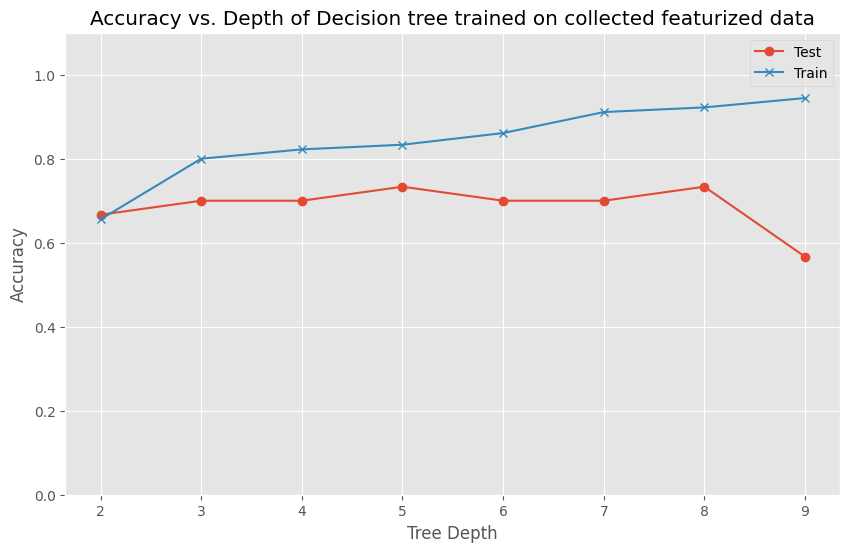

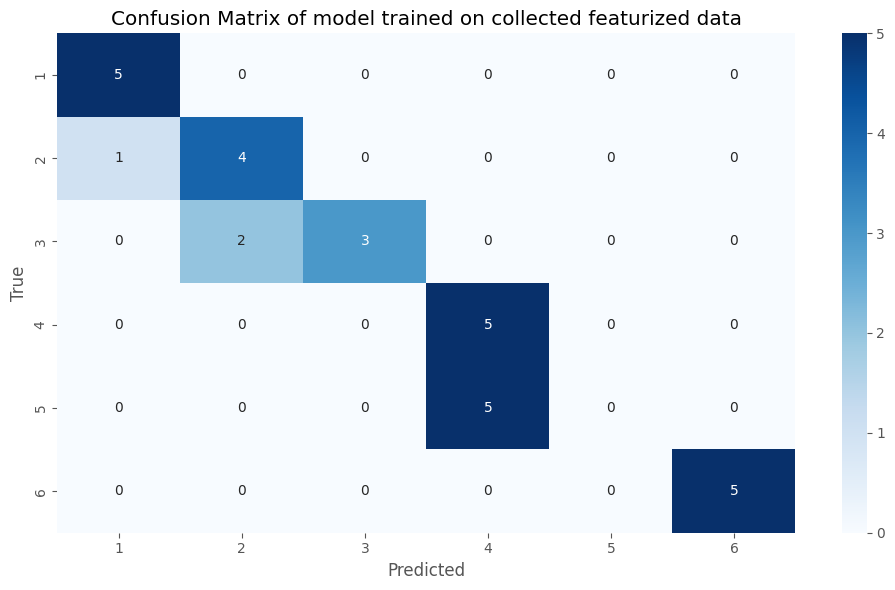

In [35]:
# Varying depths from 2 to 9
depths = list(range(2, 10))

# Lists to store accuracies and confusion matrices
accuracies_test = []
accuracies_train = []
conf_matrices = []

y_new=pd.Series(y_all.astype(str))
y_new.name="Column"
y_collected_new=pd.Series(collected_y_test.astype(str))
y_collected_new.name="Column"
pca=PCA(n_components=2)
collected_extracted_test=pca.fit_transform(collected_extracted_test)
X_extracted_train=pca.fit_transform(X_extracted_train)
collected_extracted_test=pd.DataFrame(collected_extracted_test)
collected_extracted_test.columns=["Col1", "Col2"]
X_extracted_train=pd.DataFrame(X_extracted_train)
X_extracted_train.columns=["Col1", "Col2"]

for depth in depths:
    dt_classifier = DecisionTree('entropy',depth)
    dt_classifier.fit(X_extracted_train, y_new)
      
    # Calculate accuracy on test
    y_pred_test = dt_classifier.predict(collected_extracted_test).astype(int)
    accuracy = accuracy_score(collected_y_test, y_pred_test.astype(int))
    accuracies_test.append(accuracy)
    
    #Accuracy on train
    y_pred_train = dt_classifier.predict(X_extracted_train).astype(int)
    accuracy = accuracy_score(y_new.astype(int),y_pred_train)
    accuracies_train.append(accuracy)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(collected_y_test, y_pred_test)
    conf_matrices.append(conf_matrix)

print("Accuracy of model at different depth are as follows")
print(accuracies_test)
# Plot accuracies
plt.figure(figsize=(10,6))
plt.plot(depths, accuracies_test, marker='o',label="Test")
plt.plot(depths, accuracies_train, marker='x',label="Train")
plt.title('Accuracy vs. Depth of Decision tree trained on collected featurized data')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.ylim(0,1.1)
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(conf_matrices[np.argmax(accuracies_test)], annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5,6], yticklabels=np.unique(y_test))
plt.title('Confusion Matrix of model trained on collected featurized data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout(h_pad=2)
plt.show()

Q) Test your model's performance on the collected data, explaining why it succeeded or failed.

1. Our model trained on PCA reduced featurized data achieved a higher accuracy of around 0.75 compared to the model trained on PCA reduced raw data which was around 0.45.
2. Our model's performance trained on featurized is very good. It is able to classify majority of the test samples correctly with accuracy of 0.75. We could see from the confusion matrix above, their are some mismatches between dyanamic activities which was also seen in the model trained from Sklearn decision tree. Also their has been major misclassification of standing activity as sitting activity.
3. Now looking at the our model's performance that was trained on PCA reduced raw data we could see higher degree of misclassification. The performance of sklearn learn decision tree was also not very good but it was able to distinguish between static and dyanamic activities preety well. But looking at the confusion matrix of our model on raw data, it is not able to classify between dyanamic and static activities which makes it a bad model in this case.
4. Overall we could compare our model's performance from the sklearn's model of decision tree by looking at accuracy plot at different depth and confusion matrix that we have plotted above. We could say that our model's performance is not very good but also not very bad. It is staisfactory.

By looking at models trained on same the dataset but with different features, resulted to models exhibiting significant variations in performance.The performance of models is indeed not just influenced by the choice of the model itself but also by the quality and relevance of the data and features used during the training process. Different models trained on the same data but with different features can exhibit significant variations in performance.   